In [1]:
!apt install tesseract-ocr
!pip install pytesseract tesserocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,763 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

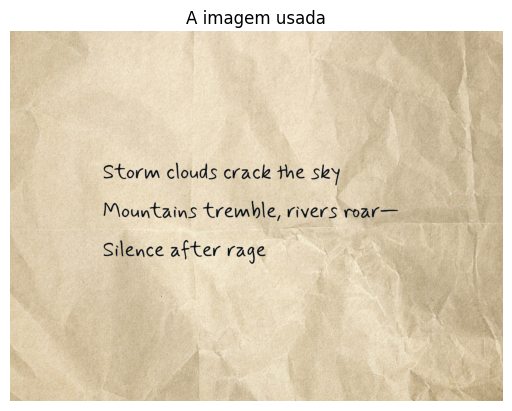

Texto extraído com path: "Storm clouds crack the sky
Mountains tremble, rivers roar—

Silence after rage
"
Duração do processo: 1.6369943618774414
Texto extraído com conteúdo do arquivo: "Storm clouds crack the sky
Mountains tremble, rivers roar—

Silence after rage
"
Duração do processo: 2.3037564754486084


In [2]:
from pytesseract import pytesseract
from PIL import Image
from time import time
import matplotlib.pyplot as plt
import os

image_path = "haiku_sample.jpg"
content = Image.open(image_path)
plt.title('A imagem usada')
plt.imshow(content)
plt.axis('off')
plt.show()

def run_tests():
  init = time()
  # Extração com path da imagem
  path_text = pytesseract.image_to_string(image_path)
  end = time()
  print(f"Texto extraído com path: \"{path_text}\"")
  print(f"Duração do processo: {end-init}")

  init = time()
  # Extração com conteúdo do arquivo
  file_text = pytesseract.image_to_string(content)
  end = time()
  print(f"Texto extraído com conteúdo do arquivo: \"{file_text}\"")
  print(f"Duração do processo: {end-init}")

run_tests()

In [3]:
os.environ['OMP_THREAD_LIMIT'] = '1' # https://tesseract-ocr.github.io/tessdoc/FAQ.html#can-i-increase-speed-of-ocr

print("Evidenciando otimização do Tesseract")

run_tests()

Evidenciando otimização do Tesseract
Texto extraído com path: "Storm clouds crack the sky
Mountains tremble, rivers roar—

Silence after rage
"
Duração do processo: 1.4430971145629883
Texto extraído com conteúdo do arquivo: "Storm clouds crack the sky
Mountains tremble, rivers roar—

Silence after rage
"
Duração do processo: 1.0484836101531982


In [4]:
!find / -name "tessdata" # Localizando pasta para inicializar o tesserocr

/usr/share/tesseract-ocr/4.00/tessdata
find: ‘/proc/71/task/71/net’: Invalid argument
find: ‘/proc/71/net’: Invalid argument


In [5]:
from tesserocr import PyTessBaseAPI

with PyTessBaseAPI(path="/usr/share/tesseract-ocr/4.00/tessdata") as Tesseract:
  Tesseract.SetImage(content)
  init = time()
  tesseroct_text = Tesseract.GetUTF8Text()
  end = time()
  print(f"Texto extraído com TesserOCR: \"{tesseroct_text}\"")
  print(f"Duração do processo: {end-init}")

Texto extraído com TesserOCR: "Storm clouds crack the sky
Mountains tremble, rivers roar—

Silence after rage
"
Duração do processo: 0.613856315612793
